Snapshot tables for Comp257 Project

In [40]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math 
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile

from matplotlib.pyplot import figure

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

In [41]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100

In [2]:
#Removing warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data cleaning for State Residence

In [3]:
StateResidence = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 0 )
StateResidence.head()

,Year,State,Population
0,1966,New South Wales,4237900
1,1991,New South Wales,5714974
2,2006,New South Wales,6549174
3,2011,New South Wales,6917656
4,2016,New South Wales,7480228


In [4]:
StateResidence.dtypes

Year           int64
State         object
Population     int64
dtype: object

In [5]:
SR_clean = StateResidence[StateResidence.State != 'Total']

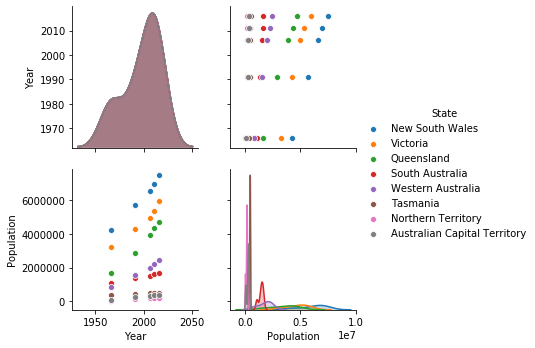

In [6]:
g = sns.pairplot(SR_clean, hue= 'State')

In [46]:
train, test = train_test_split(IS_clean,test_size = 0.3,random_state = 142)
x_train = train.drop(['Not_Stated','Non-Indigenous','Indigenous','Age','Total'],axis=1)
y_train = train["Year"]
x_test = test.drop(['Not_Stated','Non-Indigenous','Indigenous','Age','Total'],axis=1)
y_test = test["Year"]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print()

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print("LinearRegression()")
print("Checking on training values")
print("RMSC: ", math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R2: ", r2_score(y_train,y_train_pred))
print("MAE: ", mean_absolute_error(y_train,y_train_pred))
y_test_pred = model.predict(x_test)
print("Checking on testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2: ", r2_score(y_test,y_test_pred))
print("MAE: ", mean_absolute_error(y_test,y_test_pred))
print()


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("LogisticRegression():",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeRegressor(max_depth=4):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0):",accuracy_score(y_test,y_pred)) 
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=2)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=2):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=4):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=8)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=8):",accuracy_score(y_test,y_pred))
print()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("KNeighborsClassifier(n_neighbors=3):",accuracy_score(y_test,y_pred))
print()

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("KNeighborsClassifier(n_neighbors=9):",accuracy_score(y_test,y_pred))


(26, 1) (26,) (12, 1) (12,)

LinearRegression()
Checking on training values
RMSC:  0.0
R2:  1.0
MAE:  0.0
Checking on testing values
MSE:  0.0
R2:  1.0
MAE:  0.0

LogisticRegression(): 0.4166666666666667

DecisionTreeRegressor(max_depth=4): 1.0

DecisionTreeClassifier(random_state=0): 1.0

DecisionTreeClassifier(random_state=0,max_depth=2): 1.0

DecisionTreeClassifier(random_state=0,max_depth=4): 1.0

DecisionTreeClassifier(random_state=0,max_depth=8): 1.0

KNeighborsClassifier(n_neighbors=3): 1.0

KNeighborsClassifier(n_neighbors=9): 1.0


### Data cleaning for Age Sex table

In [31]:
AgeSex = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 2 )
AgeSex.head()

,Year,Gender,Median age,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,...,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total
0,2011,Males,36,729969,694561,703308,722378,741120,754466,719654,...,740962,711741,637839,597885,455420,342691,252930,188242,139162,10634014
1,2011,Females,38,691079,657360,667746,683420,719555,758771,734122,...,763180,735662,659406,608231,463899,365398,292333,248695,263518,10873705
2,2011,Persons,37,1421050,1351921,1371054,1405798,1460674,1513236,1453775,...,1504143,1447404,1297244,1206116,919319,708090,545263,436937,402681,21507719
3,2016,Males,37,752142,771055,717629,727677,795423,824084,839821,...,773170,748954,709115,632357,581230,431325,307441,204026,180351,11546638
4,2016,Females,38,712638,731592,679553,693915,771369,840525,864026,...,808282,774601,745214,667048,607766,456390,345217,256529,306494,11855248


In [25]:
AgeSex.columns

Index(['Year', 'Gender', 'Median age', '0-4 years', '5-9 years', '10-14 years',
       '15-19 years', '20-24 years', '25-29 years', '30-34 years',
       '35-39 years', '40-44 years', '45-49 years', '50-54 years',
       '55-59 years', '60-64 years', '65-69 years', '70-74 years',
       '75-79 years', '80-84 years', '85 years and over', 'Total'],
      dtype='object')

### Data cleaning for Indigenous Status and State and Territory of Usual residence

In [32]:
IngeniseStat = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 4 )
IngeniseStat.head()

,Age,Year,Aboriginal and Torres Strait Islander people(b),Non-Indigenous people,Indigenous status not stated,Total
0,Median age,2011,21,38,36,37
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798


In [33]:
IngeniseStat.rename(columns={'Aboriginal and Torres Strait Islander people(b)':'Indigenous'},inplace=True)

In [34]:
IngeniseStat.rename(columns={'Non-Indigenous people':'Non-Indigenous'},inplace=True)

In [35]:
IngeniseStat.rename(columns={'Indigenous status not stated':'Not_Stated'},inplace=True)

In [36]:
IS_clean = IngeniseStat[IngeniseStat.Age !='Median age']

In [37]:
IS_clean.head(10)

,Age,Year,Indigenous,Non-Indigenous,Not_Stated,Total
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798
5,20-24 years,2011,46454,1333621,80599,1460674
6,25-29 years,2011,38803,1387923,86513,1513236
7,30-34 years,2011,33003,1345765,75012,1453775
8,35-39 years,2011,34074,1414171,71895,1520138
9,40-44 years,2011,33605,1438347,70928,1542879
10,45-49 years,2011,28820,1407494,67831,1504143


In [45]:
train, test = train_test_split(IS_clean,test_size = 0.3,random_state = 142)
x_train = train.drop(['Not_Stated','Non-Indigenous','Indigenous','Age','Total'],axis=1)
y_train = train["Year"]
x_test = test.drop(['Not_Stated','Non-Indigenous','Indigenous','Age','Total'],axis=1)
y_test = test["Year"]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print()

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print("LinearRegression()")
print("Checking on training values")
print("RMSC: ", math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R2: ", r2_score(y_train,y_train_pred))
print("MAE: ", mean_absolute_error(y_train,y_train_pred))
y_test_pred = model.predict(x_test)
print("Checking on testing values")
print("MSE: ", mean_squared_error(y_test,y_test_pred))
print("R2: ", r2_score(y_test,y_test_pred))
print("MAE: ", mean_absolute_error(y_test,y_test_pred))
print()


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("LogisticRegression():",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeRegressor(max_depth=4):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0):",accuracy_score(y_test,y_pred)) 
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=2)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=2):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=4):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=8)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=8):",accuracy_score(y_test,y_pred))
print()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("KNeighborsClassifier(n_neighbors=3):",accuracy_score(y_test,y_pred))
print()

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("KNeighborsClassifier(n_neighbors=9):",accuracy_score(y_test,y_pred))


(26, 1) (26,) (12, 1) (12,)

LinearRegression()
Checking on training values
RMSC:  0.0
R2:  1.0
MAE:  0.0
Checking on testing values
MSE:  0.0
R2:  1.0
MAE:  0.0

LogisticRegression(): 0.4166666666666667

DecisionTreeRegressor(max_depth=4): 1.0

DecisionTreeClassifier(random_state=0): 1.0

DecisionTreeClassifier(random_state=0,max_depth=2): 1.0

DecisionTreeClassifier(random_state=0,max_depth=4): 1.0

DecisionTreeClassifier(random_state=0,max_depth=8): 1.0

KNeighborsClassifier(n_neighbors=3): 1.0

KNeighborsClassifier(n_neighbors=9): 1.0


### Data cleaning for Country

In [47]:
country = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 6 )
country.head()

,Area,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,Adelie Land (France),0,0,0,0,0,0,0,0
1,Afghanistan,13032,18116,3381,6313,5120,302,63,471
2,Aland Islands,4,5,4,4,0,0,0,0
3,Albania,315,1681,257,375,198,9,12,20
4,Algeria,584,302,234,63,139,7,18,47


In [48]:
country.columns

Index(['Area', 'New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory'],
      dtype='object')

In [49]:
country.shape

(292, 9)

In [50]:
country.rename(columns={'New South Wales':'NSW',
                        'Victoria':'VIC',
                        'Queensland':'QLD',
                        'South Australia':'SA',
                        'Western Australia':'WA',
                        'Tasmania':'TAS',
                        'Northern Territory':'NT',
                        'Australian Capital Territory':'ACT'},
              inplace=True)

In [51]:
country.columns

Index(['Area', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'], dtype='object')

In [52]:
country_clean = country[country.Area != 'Australia']
country_clean = country_clean[country_clean.Area != 'Not stated']

In [53]:
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [54]:
NSW_CC = country_clean
NSW_CC = NSW_CC.drop(['VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'],axis = 1)
NSW_CC = NSW_CC[NSW_CC.NSW !=0]
NSW_CC.describe()

,NSW
count,261.000000
mean,7940.839080
std,25460.656098
min,3.000000
25%,38.000000
50%,327.000000
75%,5093.000000
max,234508.000000


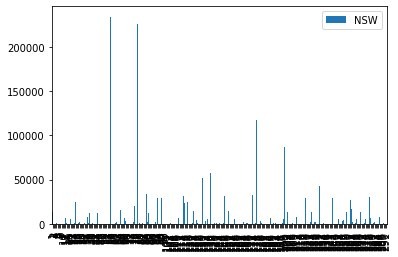

In [55]:
NSW_CC.plot.bar()

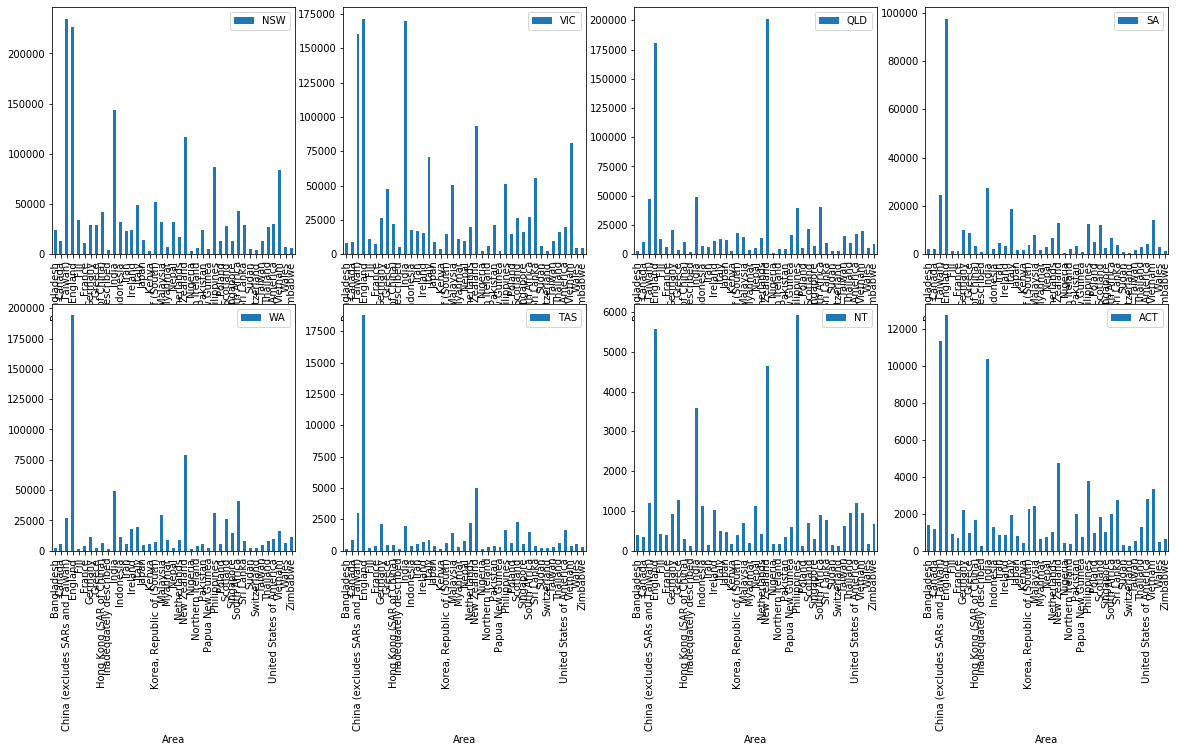

In [74]:
CC_high = country_clean[country_clean.NSW>=50]
CC_high = CC_high[CC_high.VIC>=100]
CC_high = CC_high[CC_high.QLD>=100]
CC_high = CC_high[CC_high.SA>=100]
CC_high = CC_high[CC_high.WA>=100]
CC_high = CC_high[CC_high.TAS>=100]
CC_high = CC_high[CC_high.NT>=100]
CC_high = CC_high[CC_high.ACT>=100]

fig, axs = plt.subplots(2,4,figsize=(20, 10))
CC_high.plot.bar(x='Area',y='NSW',ax= axs[0,0])
CC_high.plot.bar(x='Area',y='VIC',ax= axs[0,1])
CC_high.plot.bar(x='Area',y='QLD',ax= axs[0,2])
CC_high.plot.bar(x='Area',y='SA',ax= axs[0,3])
CC_high.plot.bar(x='Area',y='WA',ax= axs[1,0])
CC_high.plot.bar(x='Area',y='TAS',ax= axs[1,1])
CC_high.plot.bar(x='Area',y='NT',ax= axs[1,2])
CC_high.plot.bar(x='Area',y='ACT',ax= axs[1,3])


In [57]:
country.describe()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.000000,292.000000,292.000000
mean,2.561719e+04,2.029664e+04,1.610693e+04,5.742110e+03,8.474007e+03,1746.280822,783.619863,1360.842466
std,2.886936e+05,2.266803e+05,1.971260e+05,7.022368e+04,8.881068e+04,24187.295488,9347.358154,15880.928684
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.725000e+01,1.175000e+01,1.100000e+01,0.000000e+00,6.000000e+00,0.000000,0.000000,0.000000
50%,2.265000e+02,1.700000e+02,1.495000e+02,4.700000e+01,9.400000e+01,6.000000,5.500000,12.000000
75%,3.573000e+03,2.738750e+03,1.351250e+03,5.440000e+02,1.104000e+03,80.250000,49.250000,204.500000
max,4.899090e+06,3.845493e+06,3.343657e+06,1.192546e+06,1.492842e+06,411490.000000,157531.000000,270033.000000


### Data cleaning for House Composition

In [75]:
HouseCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 10 )
HouseCompos.head(10)

,State,One family households,Multiple family households,Total family households,Group households,Lone person households,Total households,Year
0,New South Wales,1426810,16745,1443555,88566,386439,1918560,1991
1,Victoria,1072422,10423,1082845,62427,290091,1435363,1991
2,Queensland,728631,6405,735036,47018,182389,964443,1991
3,South Australia,370091,2284,372375,19093,110432,501900,1991
4,Western Australia,396766,2979,399745,25134,103484,528363,1991
5,Tasmania,118725,750,119475,5192,34150,158817,1991
6,Northern Territory,32130,1529,33659,3279,7678,44616,1991
7,Australian Capital Territory,68686,510,69196,5352,15710,90258,1991
8,New South Wales,1811533,62994,1874524,109004,620778,2604314,2016
9,Victoria,1459760,35531,1495290,95588,521828,2112706,2016


In [76]:
HouseCompos.columns

Index(['State', 'One family households', 'Multiple family households',
       'Total family households', 'Group households', 'Lone person households',
       'Total households', 'Year'],
      dtype='object')

In [77]:
HouseCompos.rename(columns={'One family households':'Single_family',
                            'Multiple family households':'Multiple_family',
                            'Total family households':'Total_family_households',
                            'Group households':'Group_households',
                            'Lone person households':'Lone_person_households',
                            'Total households':'Total_households'},
                  inplace=True)

In [78]:
HouseCompos.columns

Index(['State', 'Single_family', 'Multiple_family', 'Total_family_households',
       'Group_households', 'Lone_person_households', 'Total_households',
       'Year'],
      dtype='object')

In [79]:
HouseCompos.dtypes

State                      object
Single_family               int64
Multiple_family             int64
Total_family_households     int64
Group_households            int64
Lone_person_households      int64
Total_households            int64
Year                        int64
dtype: object

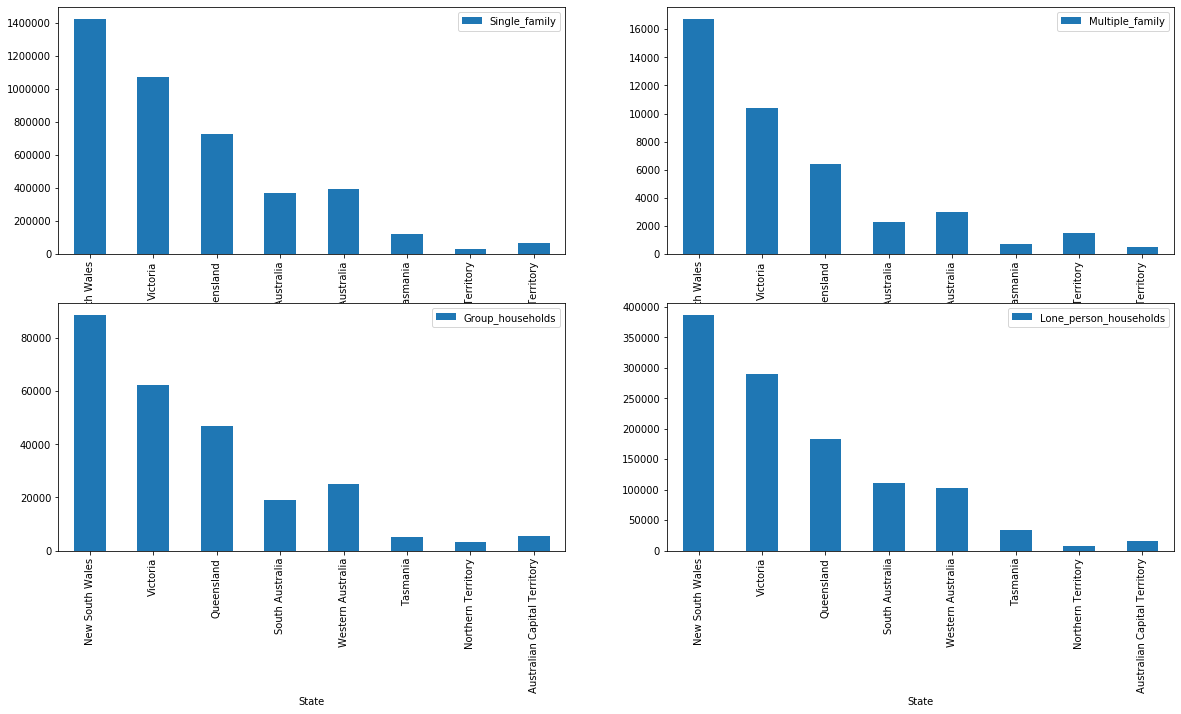

In [88]:
df = HouseCompos[HouseCompos.Year == 1991]
fig, axs = plt.subplots(2,2,figsize=(20, 10))
df.plot.bar('State','Single_family',ax=axs[0,0])
df.plot.bar('State','Multiple_family',ax=axs[0,1])
df.plot.bar('State','Group_households',ax=axs[1,0])
df.plot.bar('State','Lone_person_households',ax=axs[1,1])


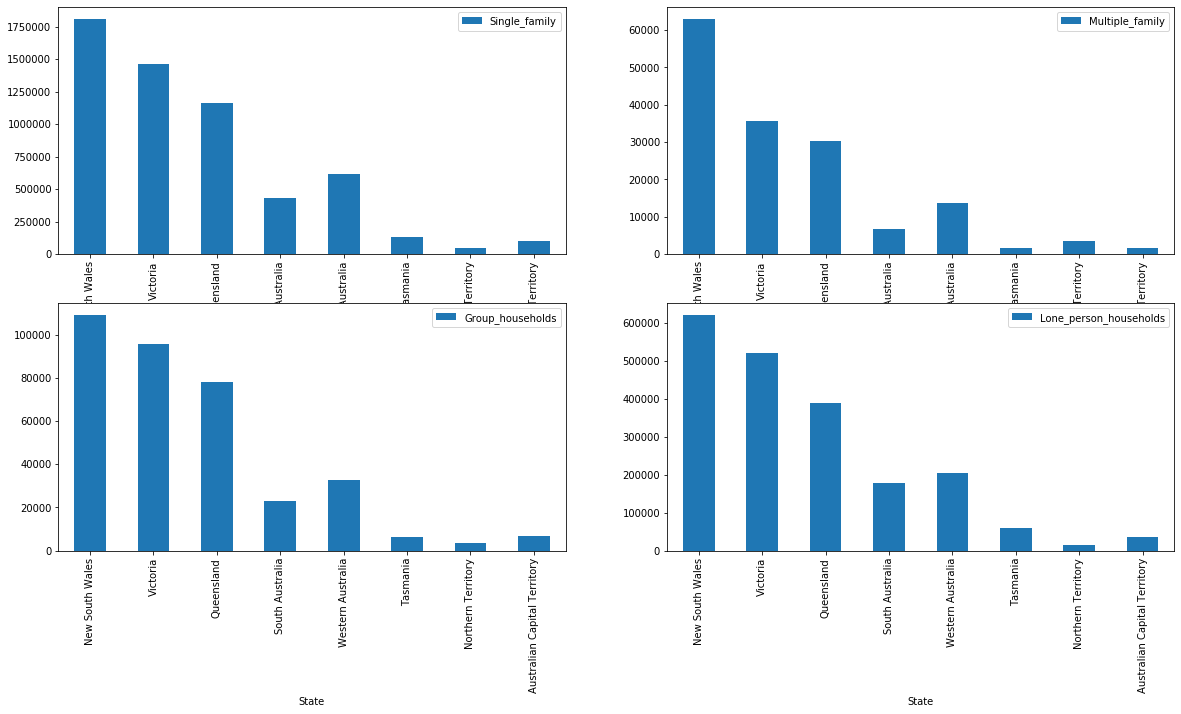

In [89]:
df = HouseCompos[HouseCompos.Year == 2016]
fig, axs = plt.subplots(2,2,figsize=(20, 10))
df.plot.bar('State','Single_family',ax=axs[0,0])
df.plot.bar('State','Multiple_family',ax=axs[0,1])
df.plot.bar('State','Group_households',ax=axs[1,0])
df.plot.bar('State','Lone_person_households',ax=axs[1,1])

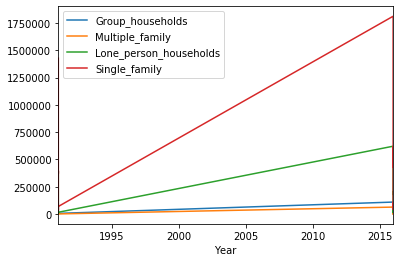

In [94]:
HouseCompos.plot(x='Year',y={'Single_family', 'Multiple_family','Group_households', 'Lone_person_households'})

### Data cleaning for State and Territory of Enumeration

In [95]:
PreHouse = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 12 )
PreHouse.head()

,State,Average no. of people per household,Year
0,New South Wales,2.8,1991
1,New South Wales,2.6,2016
2,Victoria,2.8,1991
3,Victoria,2.6,2016
4,Queensland,2.8,1991


In [96]:
PreHouse.columns

Index(['State', 'Average no. of people per household', 'Year'], dtype='object')

In [97]:
PreHouse.rename(columns={'Average no. of people per household':'Average_Pre_House'}, inplace=True)

In [98]:
PreHouse.dtypes

State                 object
Average_Pre_House    float64
Year                   int64
dtype: object

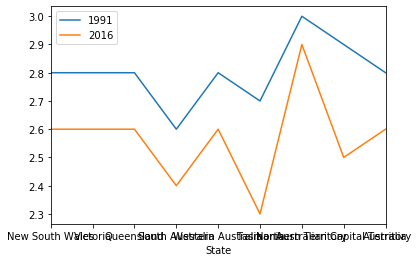

In [116]:
PreHouse1 = PreHouse[PreHouse.Year == 1991]
axs = PreHouse1.plot('State','Average_Pre_House',label='1991')
PreHouse2 = PreHouse[PreHouse.Year == 2016]
PreHouse2.plot('State','Average_Pre_House',ax = axs, label='2016')


In [106]:
train, test = train_test_split(PreHouse,test_size = 0.3,random_state = 142)
x_train = train.drop(['State','Average_Pre_House'],axis=1)
y_train = train["Year"]
x_test = test.drop(['State','Average_Pre_House'],axis=1)
y_test = test["Year"]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print()

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print("LinearRegression()")
print("Checking on training values")
print("RMSC: ", math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R2: ", r2_score(y_train,y_train_pred))
print("MAE: ", mean_absolute_error(y_train,y_train_pred))
y_test_pred = model.predict(x_test)
print("Checking on testing values")
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_test_pred)))
print("R2: ", r2_score(y_test,y_test_pred))
print("MAE: ", mean_absolute_error(y_test,y_test_pred))
print()


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("LogisticRegression():",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeRegressor(max_depth=4):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0):",accuracy_score(y_test,y_pred)) 
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=2)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=2):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=4):",accuracy_score(y_test,y_pred))
print()

model  = DecisionTreeClassifier(random_state=0,max_depth=8)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("DecisionTreeClassifier(random_state=0,max_depth=8):",accuracy_score(y_test,y_pred))
print()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("KNeighborsClassifier(n_neighbors=3):",accuracy_score(y_test,y_pred))
print()

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)
print("KNeighborsClassifier(n_neighbors=9):",accuracy_score(y_test,y_pred))


(12, 1) (12,) (6, 1) (6,)

LinearRegression()
Checking on training values
RMSC:  0.0
R2:  1.0
MAE:  0.0
Checking on testing values
RMSE:  0.0
R2:  1.0
MAE:  0.0

LogisticRegression(): 0.5

DecisionTreeRegressor(max_depth=4): 1.0

DecisionTreeClassifier(random_state=0): 1.0

DecisionTreeClassifier(random_state=0,max_depth=2): 1.0

DecisionTreeClassifier(random_state=0,max_depth=4): 1.0

DecisionTreeClassifier(random_state=0,max_depth=8): 1.0

KNeighborsClassifier(n_neighbors=3): 1.0

KNeighborsClassifier(n_neighbors=9): 1.0


### Family Composition dataframe 

In [101]:
FamilyCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 15 )
FamilyCompos.head()

,Unnamed: 0,Year,Couple families with children,Couple families without children,Total
0,Male same-sex couples,2011,502,17081,17583
1,Female same-sex couples,2011,3581,12551,16132
2,Total same-sex couples,2011,4083,29632,33715
3,Opposite-sex couples,2011,2530318,2120670,4650988
4,Male same-sex couples,2016,1067,22676,23741


In [133]:
FamilyCompos.columns

Index(['Couple_type', 'Year', 'Couple families with children',
       'Couple families without children', 'Total'],
      dtype='object')

In [118]:
FamilyCompos.rename(columns={'Unnamed: 0':'Couple_type'},inplace=True)

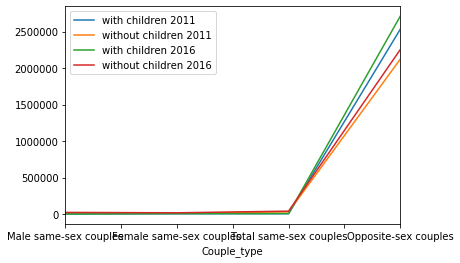

In [138]:
FamilyCompos1 = FamilyCompos[FamilyCompos.Year == 2011]
a1 = FamilyCompos1.plot('Couple_type','Couple families with children',label ='with children 2011')
a2 = FamilyCompos1.plot('Couple_type','Couple families without children',ax= a1, label='without children 2011')
FamilyCompos2 = FamilyCompos[FamilyCompos.Year == 2016]
a3 = FamilyCompos2.plot('Couple_type','Couple families with children', ax = a2, label ='with children 2016')
FamilyCompos2.plot('Couple_type','Couple families without children',ax= a3, label='without children 2016')

### Tenure

In [147]:
Tenure = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 18 )
Tenure.head()

,State,Owned outright,Owned with a mortgage,Rented,Total Dwellings,year
0,Australian Capital Territory,22770,35190,29771,90258,1991
1,Australian Capital Territory,38555,54832,45346,142664,2016
2,New South Wales,818215,487459,525542,1918560,1991
3,New South Wales,839665,840004,826922,2604314,2016
4,Northern Territory,5867,10788,23682,44616,1991


In [148]:
Tenure.columns

Index(['State', 'Owned outright', 'Owned with a mortgage', 'Rented',
       'Total Dwellings', 'year'],
      dtype='object')

C:\Users\Hamza\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


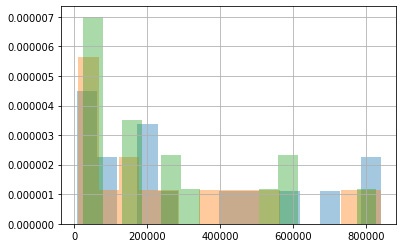

In [149]:
Tenure1 = Tenure[Tenure.year != '1991']
TOO1 = Tenure1['Owned outright']
TOM1 = Tenure1['Owned with a mortgage']
TRE1 = Tenure1['Rented']
TOO1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TOM1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TRE1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)



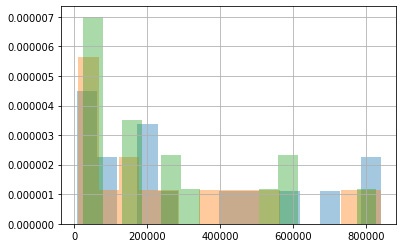

In [150]:
Tenure2 = Tenure[Tenure.year != '2016']
TOO2 = Tenure2['Owned outright']
TOM2 = Tenure2['Owned with a mortgage']
TRE2 = Tenure2['Rented']
TOO2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TOM2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TRE2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)

